<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Serpientes_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATRIZ DE TRANSICIÓN DEL JUEGO (20 CASILLAS)

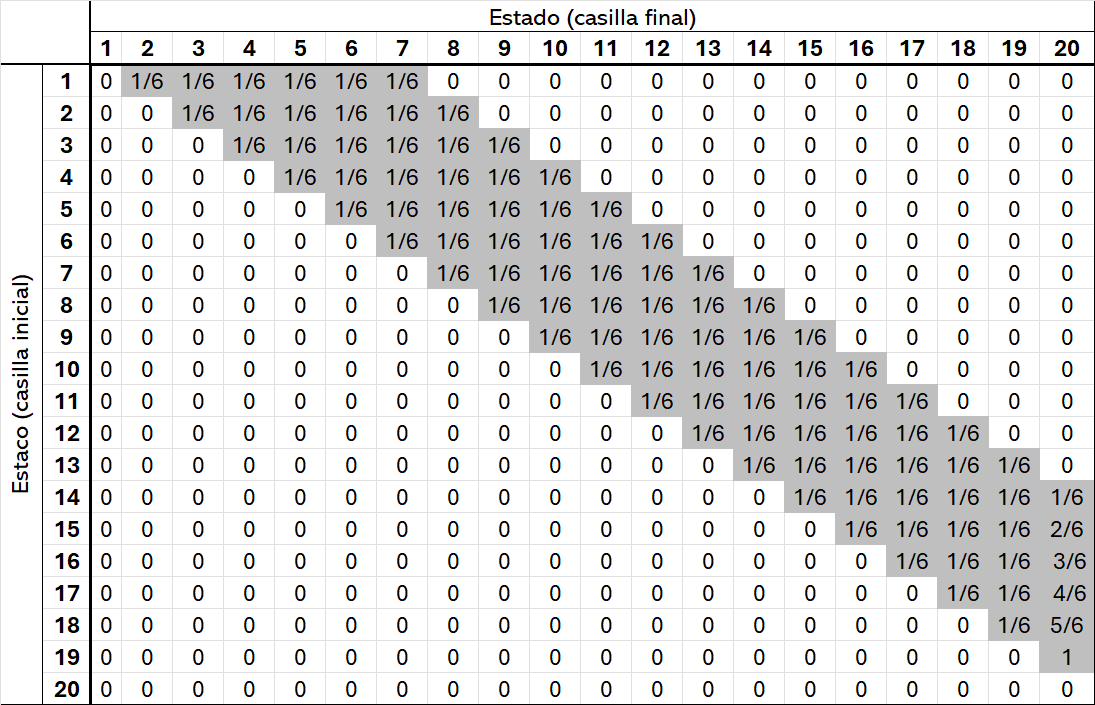

# CÓDIGO

In [1]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [74]:
def casillas(posicion):
  if posicion==3:
    posicion=11
  elif posicion==15:
    posicion=19
  elif posicion==13:
    posicion=4
  elif posicion==17:
    posicion=10
  return posicion

In [75]:
def exp(n):
  lista=[]
  for i in range(n):
    posicion=0
    cont=0
    while posicion<20:
      tiro=rnd.choices([1,2,3,4,5,6])
      posicion+=tiro[0]
      casillas(posicion)
      cont+=1
    lista.append(cont)
  prob=np.mean(lista)
  return prob

In [76]:
sim=1000
tiros_totales=[]
for i in range(sim):
  tiros_totales.append(exp(100))
prob=np.mean(tiros_totales)
print(prob)

6.18929


In [ ]:
print("La media de tiros necesarios es:", prob)
plt.hist(lista, bins=8)
plt.title("Histograma de tiros necesarios (10000 repeticiones)")
plt.xlabel("Tiros")
plt.ylabel("Frecuencia")
plt.show()

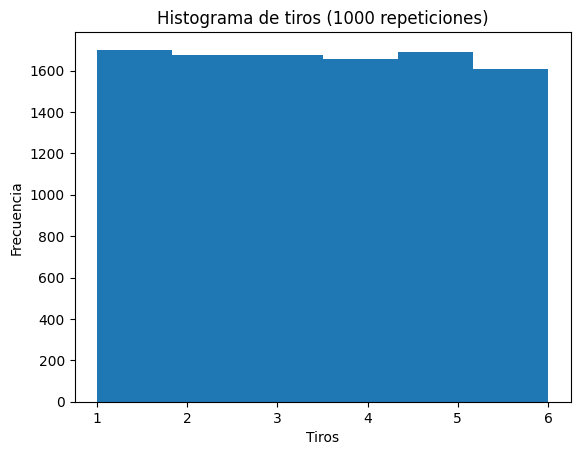

In [58]:
tiro_s=rnd.choices([1,2,3,4,5,6],k=10000)
plt.hist(tiro_s,bins=6)
plt.title("Histograma de tiros (1000 repeticiones)")
plt.xlabel("Tiros")
plt.ylabel("Frecuencia")
plt.show()

In [77]:
import random

# Definimos el tablero de serpientes y escaleras
serpientes = {13: 4, 17: 10}
escaleras = {3: 11, 15: 19}

# Función para simular un juego de serpientes y escaleras
def jugar():
    posicion = 0
    tiros = 0

    while posicion < 20:
        # Tirar dado
        dado = random.randint(1, 6)
        tiros += 1

        # Mover jugador
        posicion += dado

        # Revisar si cayó en una serpiente o escalera
        if posicion in serpientes:
            posicion = serpientes[posicion]
        elif posicion in escaleras:
            posicion = escaleras[posicion]

        # Limitar la posición a 20
        if posicion > 20:
            posicion = 20

    return tiros

# Simulación de múltiples juegos
def simulacion_juegos(num_simulaciones):
    tiros_totales = 0

    for _ in range(num_simulaciones):
        tiros_totales += jugar()

    # Calcular el promedio de tiros
    promedio_tiros = tiros_totales / num_simulaciones
    return promedio_tiros

# Número de simulaciones
num_simulaciones = 10000
promedio = simulacion_juegos(num_simulaciones)
print(f"El promedio de tiros necesarios para llegar a la casilla 20 es: {promedio:.2f}")

El promedio de tiros necesarios para llegar a la casilla 20 es: 7.01
